## Pyber Ride Sharing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [5]:
city_data = pd.read_csv('raw_data\\city_data.csv')
ride_data = pd.read_csv('raw_data\\ride_data.csv')

In [6]:
print(city_data.columns)
print(ride_data.columns)

Index(['city', 'driver_count', 'type'], dtype='object')
Index(['city', 'date', 'fare', 'ride_id'], dtype='object')


In [7]:
grouped_by_city = ride_data.groupby(by='city')

In [8]:
average_fare_per_city = grouped_by_city['fare'].mean()
total_rides_per_city = grouped_by_city['ride_id'].count()
total_fares_per_city = grouped_by_city['fare'].sum()

In [9]:
merged = pd.merge(city_data,average_fare_per_city.to_frame('average fare'), left_on = 'city', right_index = True)
merged = pd.merge(merged,total_rides_per_city.to_frame('total rides'), left_on = 'city', right_index = True)
merged = pd.merge(merged,total_fares_per_city.to_frame('total fares'), left_on = 'city', right_index = True)

In [10]:
ncities = len(merged)

In [11]:
plt.style.use(['ggplot'])

## Bubble Plot of Ride Sharing Data

Text(1,0.6,'Note:\nCircle area represents driver count per city,\nranging from 1 to 73')

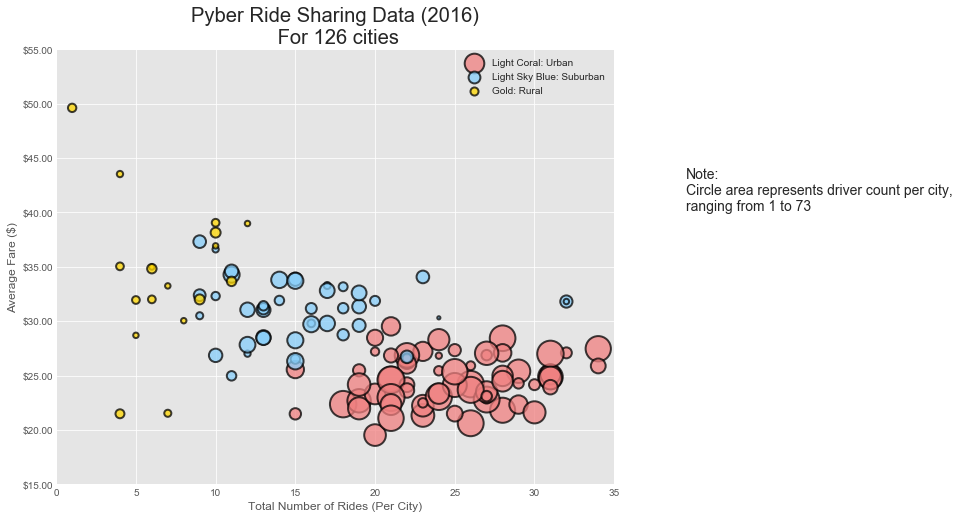

In [13]:
# Gold, Light Sky Blue, Light Coral
bubble_scale_factor = 10
legend_strings = []
color_codes = {'Gold': '#FFD700', 'Light Sky Blue': '#87CEFA', 'Light Coral': '#F08080'}
type_colors = {'Urban': 'Light Coral', 'Suburban': 'Light Sky Blue', 'Rural': 'Gold'}
fig, ax = plt.subplots(figsize=(10, 8))
for t in merged.type.unique():
    selected = merged[merged.type == t]
    ax.scatter(selected['total rides'], selected['average fare'], selected['driver_count'] * bubble_scale_factor, c=color_codes[type_colors[t]], alpha = 0.75, edgecolor = 'black', linewidths = 2)
    legend_string = "{}: {}".format(type_colors[t], t)
    legend_strings.append(legend_string)
ax.legend(legend_strings)
ax.axis([0,35,15,55])
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)
ax.set_title("Pyber Ride Sharing Data (2016)\n For {} cities".format(ncities))
#              \nBubble size represents total rides for each city,\nranging from {} to {}".
#              format(ncities, min(total_rides_per_city), max(total_rides_per_city)))
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.yaxis.set_major_formatter(FormatStrFormatter('$%.2f'))
plt.figtext(1,.6,'Note:\nCircle area represents driver count per city,\nranging from {} to {}'.
    format(min(merged['driver_count']), max(merged['driver_count'])))


## Total Fares by City Type

Text(0.5,1.5,'% of Total Fares by City Type')

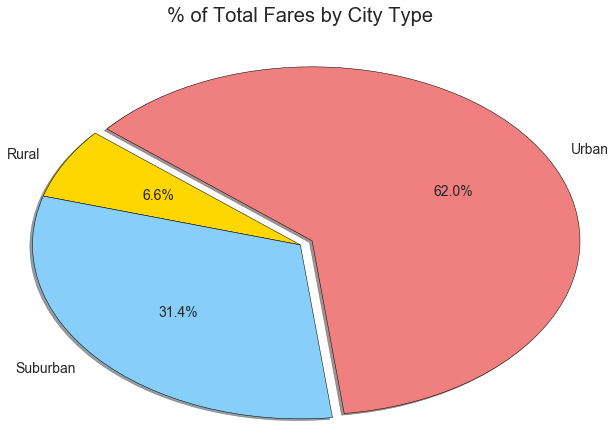

In [101]:
grouped_by_type = merged.groupby(by = 'type')
total_fares_by_type = grouped_by_type['total fares'].sum()
percent_strings = ["{:2.1f}%".format(x) for x in (100 * total_fares_by_type.values / total_fares_by_type.sum())]
colors = [color_codes[type_colors[x]] for x in total_fares_by_type.index]
plt.pie(total_fares_by_type, 
        explode = [0,0,.1], 
        labels = total_fares_by_type.index, 
        colors = colors, 
        autopct='%.1f%%', 
        shadow=True, 
        startangle=140, 
        radius=2,
        wedgeprops = {'linewidth': 0.5, 'edgecolor' : 'black'})
plt.title('% of Total Fares by City Type', y=1.5)

## Total Rides by City Type

Text(0.5,1.5,'% of Total Rides by City Type')

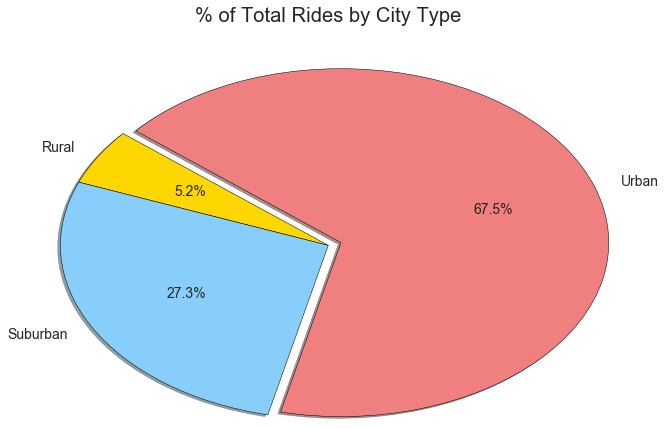

In [110]:
grouped_by_type = merged.groupby(by = 'type')
total_rides_by_type = grouped_by_type['total rides'].sum()
colors = [color_codes[type_colors[x]] for x in total_rides_by_type.index]
plt.pie(total_rides_by_type, 
        explode = [0,0,.1], 
        labels = total_rides_by_type.index, 
        colors = colors, 
        autopct='%.1f%%', 
        shadow=True, 
        startangle=140, 
        radius=2,
        wedgeprops = {'linewidth': 0.5, 'edgecolor' : 'black'})
plt.title('% of Total Rides by City Type', y=1.5)

## Total Drivers by City Type

Text(0.5,1.5,'% of Total Drivers by City Type')

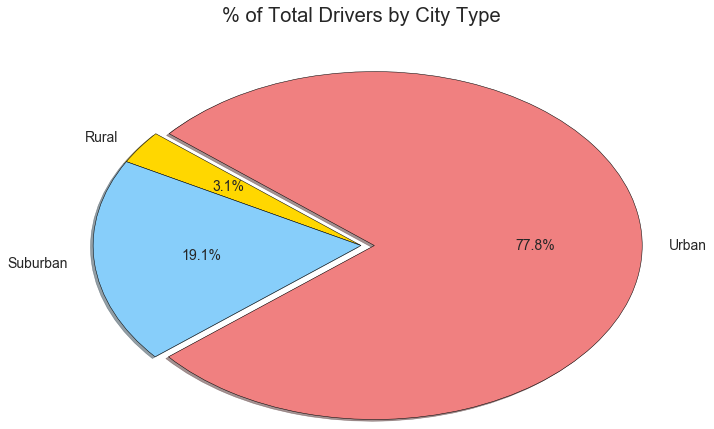

In [105]:
grouped_by_type = city_data.groupby(by = 'type')
total_drivers_by_type = grouped_by_type['driver_count'].sum()
percent_strings = ["{:2.1f}%".format(x) for x in (100 * total_drivers_by_type.values / total_drivers_by_type.sum())]
colors = [color_codes[type_colors[x]] for x in total_drivers_by_type.index]
plt.pie(total_drivers_by_type, 
        explode = [0,0,.1], 
        labels = total_drivers_by_type.index, 
        colors = colors, 
        autopct='%.1f%%', 
        shadow=True, 
        startangle=140, 
        radius=2,
        wedgeprops = {'linewidth': 0.5, 'edgecolor' : 'black'})
plt.title('% of Total Drivers by City Type', y=1.5)